In [1]:
# 计算离散最优传输（OT）距离
import numpy as np
import ot  # POT库

# 两个离散分布的概率向量（必须归一化为和为1）
a = np.array([0.5, 0.5])      # 源分布
b = np.array([0.5, 0.3, 0.2]) # 目标分布

# 源和目标的支持点（如一维坐标）
X = np.array([[0.0], [1.0]])
Y = np.array([[0.0], [1.0], [2.0]])

# 计算代价矩阵（欧氏距离的平方）
M = ot.dist(X, Y, metric='euclidean') ** 2

# 计算最优传输计划
T = ot.emd(a, b, M)

# 计算最优传输距离
ot_distance = np.sum(T * M)

print("最优传输距离：", ot_distance)
print("最优传输计划：\n", T)

最优传输距离： 0.2
最优传输计划：
 [[0.5 0.  0. ]
 [0.  0.3 0.2]]


## 测试计算时间

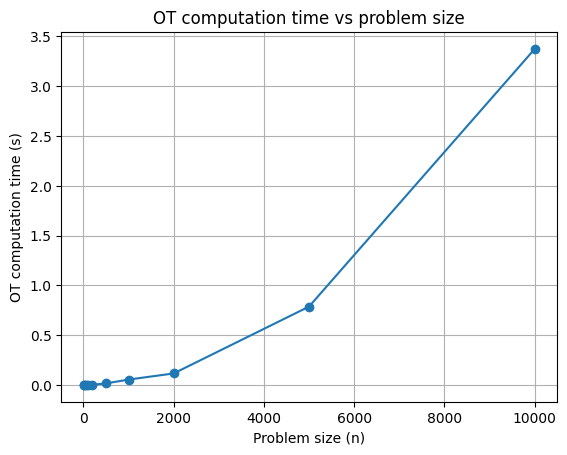

In [4]:
import numpy as np
import ot
import time
import matplotlib.pyplot as plt

sizes = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
times = []

for n in sizes:
    a = np.ones(n) / n
    b = np.ones(n) / n
    X = np.arange(n).reshape(-1, 1)
    Y = np.arange(n).reshape(-1, 1)
    M = ot.dist(X, Y, metric='euclidean') ** 2

    start = time.time()
    T = ot.emd(a, b, M)
    end = time.time()
    times.append(end - start)

plt.plot(sizes, times, marker='o')
plt.xlabel('Problem size (n)')
plt.ylabel('OT computation time (s)')
plt.title('OT computation time vs problem size')
plt.grid(True)
plt.show()